<a href="https://colab.research.google.com/github/rupakgoyal/test/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(train_data,train_labels) ,(test_data,test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
[min(min(x) for x in train_data)]

[1]

In [5]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [6]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [7]:
len(train_data[0])

218

In [8]:
' '.join([reverse_word_index.get(i-2,'?') for  i in train_data[0]])

"? that on as about parts admit ready speaking really care boot see holy and again who each a are any about brought life what power ? br they sound everything a though and part life look ? fan recommend like and part elegant successful for feeling from this based and take what as of those core movie that on and manage airplane 4 and on me because i as about parts from been was this military and on for kill for i as cinematography with ? a which let i is left is two a and seat raises as sound see worried by and still i as from running a are off good who scene some are church by of on i come he bad more a that gives as into ? is and films best commenting was each and ? to rid a beyond who me about parts final his keep special has to and ? manages this characters how and perhaps was american too at references no his something of enough russ with and bit on film say final his sound a back one jews with good who he there's made are characters and bit really as from harry how i as actor a as

In [9]:
reverse_word_index.get(2)

'and'

In [10]:
reverse_word_index.get(2)

'and'

In [11]:
reverse_word_index.get(11)

'this'

In [12]:
import numpy as np


In [13]:
def vectorize_sequence(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

In [79]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [15]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [80]:
y_train = np.asarray(train_labels.astype('float32'))
y_test = np.asarray(test_labels.astype('float32'))

In [81]:
x_train.shape

(25000, 10000)

In [82]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.5505 - accuracy: 0.7302
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.3443 - accuracy: 0.8990
Epoch 3/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2356 - accuracy: 0.9260
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step


In [69]:
from keras import models
from  keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [70]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics = ['acc'])

In [71]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [72]:
history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 109us/step - loss: 0.5565 - acc: 0.7724 - val_loss: 0.4378 - val_acc: 0.8628
Epoch 2/4
15000/15000 [==============================] - 1s 98us/step - loss: 0.3571 - acc: 0.8941 - val_loss: 0.3333 - val_acc: 0.8832
Epoch 3/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.2559 - acc: 0.9229 - val_loss: 0.3140 - val_acc: 0.8713
Epoch 4/4
15000/15000 [==============================] - 1s 100us/step - loss: 0.1986 - acc: 0.9388 - val_loss: 0.2755 - val_acc: 0.8937


In [73]:
history_acc = history.history

In [74]:
history_acc['val_loss']

[0.43781281323432925,
 0.33330436129570007,
 0.3139710156440735,
 0.2755132779598236]

In [75]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)


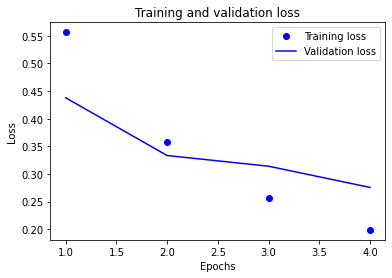

In [76]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
# “bo” is for “blue dot.”
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# “b” is for “solid blue line.”
plt.show()

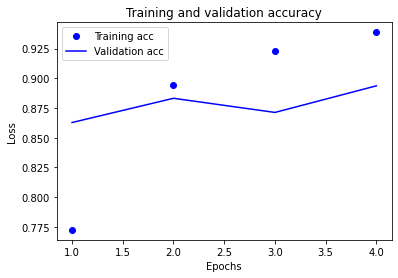

In [77]:
plt.clf() 
# Clears the figure acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()


In [83]:
model.predict(x_test)

array([[0.21378455],
       [0.99998724],
       [0.9821347 ],
       ...,
       [0.2224397 ],
       [0.10740131],
       [0.711086  ]], dtype=float32)

In [85]:
max(model.predict(x_test))

array([1.], dtype=float32)